# Classification

## Data Preparation

In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
n_data = torch.ones(100, 2)
# torch.normal(mean, std) generates a tensor of 
# random numbers drawn from normal distribution
class_0 = torch.normal(2*n_data, 1) # coordinate of each data point
class_1 = torch.normal(-2*n_data, 1) 
label_0 = torch.zeros(100)
label_1 = torch.ones(100)
x = torch.cat((class_0, class_1), 0).type(torch.FloatTensor)
y = torch.cat((label_0, label_1), 0).type(torch.LongTensor) # 64-bit integer

x, y = Variable(x), Variable(y)


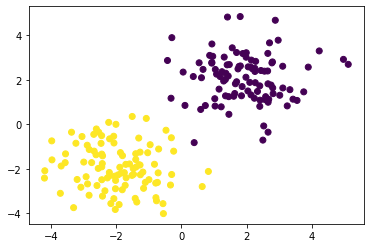

In [3]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy())
plt.show()

## Build Netural Network

The network architecture is shown as follows:

```
        W1,b1     hidden       ReLu            W2,b2
   X    =====>     layer      =====>   h_out   =====>  score 
(x1,x2)         (10 neurons)                          (s1,s2)
```

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden) # n_hidden: number of neurons in the hidden layer 
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        h_out = torch.relu(self.hidden(x))
        score = self.predict(h_out)
        return score

In [5]:
net = Net(n_features=2, n_hidden=10, n_output=2) 
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


We can also build a network in a convenient way:

In [6]:
fast_net = torch.nn.Sequential(
    torch.nn.Linear(2, 10), 
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2)
)
print(fast_net)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


## Trainning

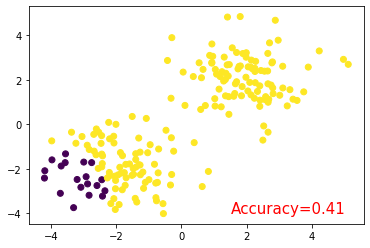

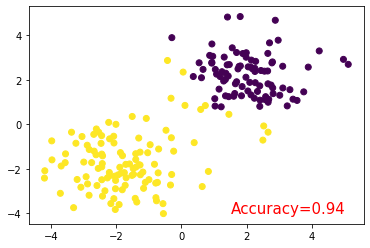

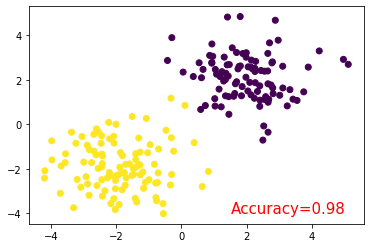

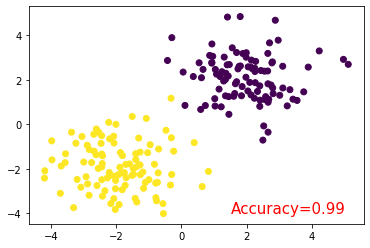

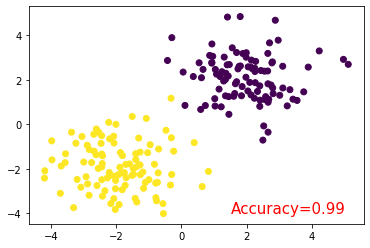

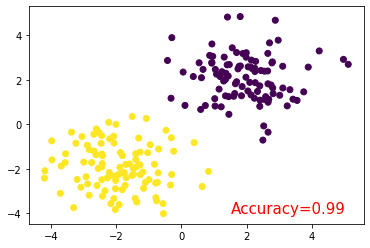

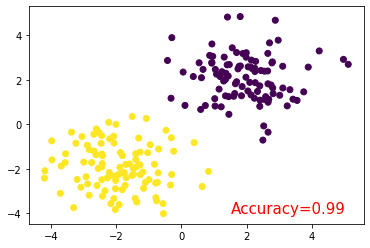

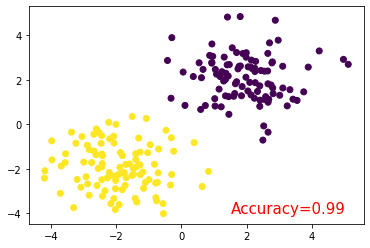

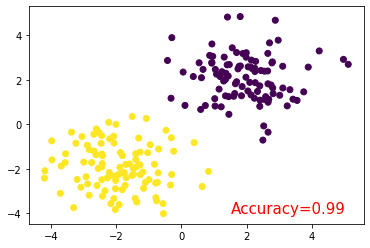

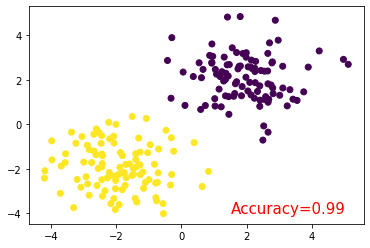

In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.05) # lr: learning rate
loss_function = torch.nn.CrossEntropyLoss() # using softmax function to compute the loss
epoch = 100

for i in range(epoch):
    score = net(x) # feed x into the net and return the prediction
    loss = loss_function(score, y) # compute the loss
    
    optimizer.zero_grad() # empty the gradients of the last step
    loss.backward() # backward pass to compute the gradients
    optimizer.step() # update the parameters 
    
    # plot learning process
    if i%10 == 0:
        prediction = torch.max(score, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y)
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 15, 'color':  'red'})
        plt.show()

In [8]:
for param in net.named_parameters():
    print(param[0])

hidden.weight
hidden.bias
predict.weight
predict.bias


In [9]:
print('W1:', list(net.parameters())[0].data.numpy(), 
      '\n\n', 'b1:', list(net.parameters())[1].data.numpy(),
      '\n\n', 'W2:', list(net.parameters())[2].data.numpy(),
      '\n\n', 'b2:', list(net.parameters())[3].data.numpy())

W1: [[-0.38614056  0.4236864 ]
 [ 0.9591168   0.85466504]
 [-0.07119745 -0.0860504 ]
 [-0.55334467  0.11477636]
 [-0.73861736  0.5696413 ]
 [ 0.2506099  -0.25523767]
 [-0.84155494 -0.86333555]
 [-0.60743594  0.42316103]
 [ 0.56844604 -0.31733128]
 [-0.20063233  0.68909156]] 

 b1: [-0.13655308 -0.4023969  -0.44867504 -0.6114282   0.17005715 -0.6637089
  0.01343184 -0.27293253  0.10307857 -0.6346638 ] 

 W2: [[-6.21362291e-02  7.27085114e-01  2.16967240e-01 -2.25343984e-02
  -1.05326930e-02 -2.42670923e-01 -3.35734725e-01  1.05935149e-01
   8.81356755e-05 -6.17689267e-02]
 [-2.23541688e-02 -5.56391120e-01 -1.29504740e-01  8.16217437e-02
   1.07714385e-01  3.10588658e-01  8.85902882e-01  6.29555285e-02
  -1.95758063e-02 -2.25342274e-01]] 

 b2: [0.21583359 0.18472801]


## Appendix: torch.max()

In [10]:
a = torch.randn(4, 4)

print(a, '\n\n', torch.max(a,0),  
     '\n\n', torch.max(a,0)[0], # the maximum values of each column
     '\n\n', torch.max(a,0)[1]) # the indices of the maximum values

print('-'*50)

print(a, '\n\n', torch.max(a,1),
     '\n\n', torch.max(a,1)[0], # the maximum values of each row
     '\n\n', torch.max(a,1)[1]) # the indices of the maximum values

tensor([[ 0.4366,  0.6255, -1.3602, -0.9850],
        [-1.5272,  0.7155, -1.2363,  0.5377],
        [ 0.4909,  1.5568,  0.7199, -1.8621],
        [ 2.0396, -0.4614, -1.4550,  0.9555]]) 

 torch.return_types.max(
values=tensor([2.0396, 1.5568, 0.7199, 0.9555]),
indices=tensor([3, 2, 2, 3])) 

 tensor([2.0396, 1.5568, 0.7199, 0.9555]) 

 tensor([3, 2, 2, 3])
--------------------------------------------------
tensor([[ 0.4366,  0.6255, -1.3602, -0.9850],
        [-1.5272,  0.7155, -1.2363,  0.5377],
        [ 0.4909,  1.5568,  0.7199, -1.8621],
        [ 2.0396, -0.4614, -1.4550,  0.9555]]) 

 torch.return_types.max(
values=tensor([0.6255, 0.7155, 1.5568, 2.0396]),
indices=tensor([1, 1, 1, 0])) 

 tensor([0.6255, 0.7155, 1.5568, 2.0396]) 

 tensor([1, 1, 1, 0])
